## Ebube Ndubuisi
### ANLY-6500
### Module 3 Homework 3

### Regression Using PyTorch – Homework Instructions
**1. Review the Materials**

Begin by thoroughly reviewing the lecture notes and watching the lecture videos. The concepts and techniques discussed in this module will guide your implementation of regression models in PyTorch.

**2. Select a Dataset (2 points)**

Choose a new dataset that can be used for a regression task.

Write a brief paragraph (3–5 sentences) describing the dataset you selected. Include the following:

- The source of the dataset

- The variables/features included

- The target variable for regression

- Any preprocessing or cleaning steps you performed, if there are any

*⚠️ Do not reuse any example datasets or class examples provided in the lecture notes or videos.*

**3. Build Regression Models (6 points)**

Using PyTorch, implement two regression models on your selected dataset. Your models should differ in structure or approach in a meaningful way (e.g., number of layers, hidden units, etc.). Use two different activation functions in your models (e.g., ReLU, Sigmoid, Tanh). Observe how the choice of activation affects performance.

**5. Analyze and Reflect (2 points)**

After training your models, provide comments and insights on the results:

- How well does each model perform?

- What might explain the differences in performance?

-  activation function worked better, and why?

- Which model would you recommend, and under what conditions?



In [2]:
%ls

 Module-3-HW3-Ebube-Ndubuisi.ipynb      synthetic_weather_data.csv
 P2_Module_3_HW3_Ebube_Ndubuisi.ipynb  'Weather Data.csv'


In [3]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim

In [4]:
df_orig = pd.read_csv("Weather Data.csv")
df_orig

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [5]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


### About the data

**Dataset**: Weather Data.csv

**Source:**

  This dataset was downloaded from Kaggle for building machine learning regression models.

  link: https://www.kaggle.com/code/krystianadammolenda/weather-dataset-cleaning-regression/notebook

**Columns:**

- Date/Time
- Temp_C
- Dew Point Temp_C
- Rel Hum%
- Wind Speed_km/h
- Visibility_km
- Press_kPa
- Weather

**Features:**

- Dew Point Temp_C
- Rel Hum%
- Wind Speed_km/h
- Visibility_km
- Press_kPa

**Target Variable:**

- Temp_C

**Processing Needed:**

  I will not be using the Date/Time column as well as the weather columns for this assignment. So, I will create a new dataframe where I drop those columns

#### Create a new dataframe with only the required columns

In [6]:
df_orig.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [7]:
df_orig.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [30]:
import matplotlib.pyplot as plt


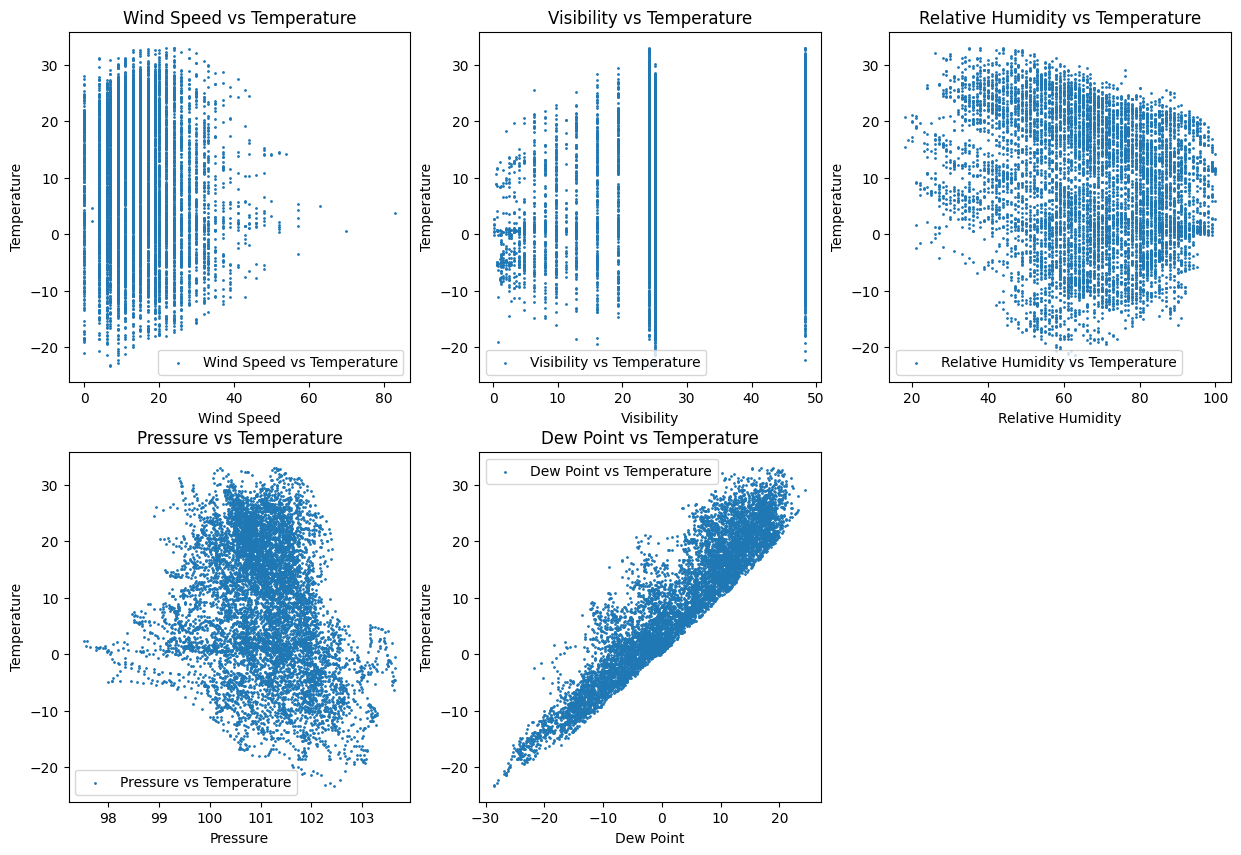

In [47]:
fig1 = plt.figure(figsize=(15,10))

#ax1
ax = plt.subplot(2,3,1)
x = df_orig["Wind Speed_km/h"]
y = df_orig["Temp_C"]
ax.scatter(x, y, s=1, label="Wind Speed vs Temperature")
ax.set_title("Wind Speed vs Temperature")
ax.set_xlabel("Wind Speed")
ax.set_ylabel("Temperature")

plt.legend()

#ax2
ax = plt.subplot(2,3,2)
x = df_orig["Visibility_km"]
y = df_orig["Temp_C"]
ax.scatter(x, y, s=1, label="Visibility vs Temperature")
ax.set_title("Visibility vs Temperature")
ax.set_xlabel("Visibility")
ax.set_ylabel("Temperature")

plt.legend()

#ax3
ax = plt.subplot(2,3,3)
x = df_orig["Rel Hum_%"]
y = df_orig["Temp_C"]
ax.scatter(x, y, s=1, label="Relative Humidity vs Temperature")
ax.set_title("Relative Humidity vs Temperature")
ax.set_xlabel("Relative Humidity")
ax.set_ylabel("Temperature")

plt.legend()

#ax4
ax = plt.subplot(2,3,4)
x = df_orig["Press_kPa"]
y = df_orig["Temp_C"]
ax.scatter(x, y, s=1, label="Pressure vs Temperature")
ax.set_title("Pressure vs Temperature")
ax.set_xlabel("Pressure")
ax.set_ylabel("Temperature")

plt.legend()

#ax5
ax = plt.subplot(2,3,5)
x = df_orig["Dew Point Temp_C"]
y = df_orig["Temp_C"]
ax.scatter(x, y, s=1, label="Dew Point vs Temperature")
ax.set_title("Dew Point vs Temperature")
ax.set_xlabel("Dew Point")
ax.set_ylabel("Temperature")

plt.legend()


plt.show()

**Wind Speed_km/h vs Temp_C:** The scatter plot shows no clear linear or strong non-linear relationship between wind speed and temperature. The points are scattered widely across the range of temperatures for various wind speeds, indicating that wind speed alone is not a good predictor of temperature in this dataset.

**Visibility_km vs Temp_C:** There appears to be a weak positive correlation between visibility and temperature. As temperature increases, there is a general trend towards higher visibility, although there is still significant spread in the data, especially at lower temperatures.

**Rel Hum_% vs Temp_C:** The plot for Relative Humidity vs. Temperature shows a negative correlation. As temperature increases, the relative humidity generally decreases. This relationship appears somewhat stronger than the one between visibility and temperature.

**Press_kPa vs Temp_C:** The relationship between atmospheric pressure and temperature seems less clear than relative humidity. There might be a very weak negative correlation, but the points are quite scattered, suggesting pressure is not a strong predictor of temperature on its own.

**Dew Point Temp_C vs Temp_C:** This plot shows a very strong positive linear relationship between Dew Point Temperature and Temperature. As the Dew Point Temperature increases, the Temperature also increases almost proportionally. This indicates that Dew Point Temperature is a strong predictor of Temperature in this dataset.

In summary, among the variables plotted, Dew Point Temp_C shows the strongest relationship with Temp_C, followed by Rel Hum_% (negative correlation) and possibly Visibility_km (weak positive correlation). Wind Speed_km/h and Press_kPa appear to have weak or no clear individual linear relationships with Temp_C.

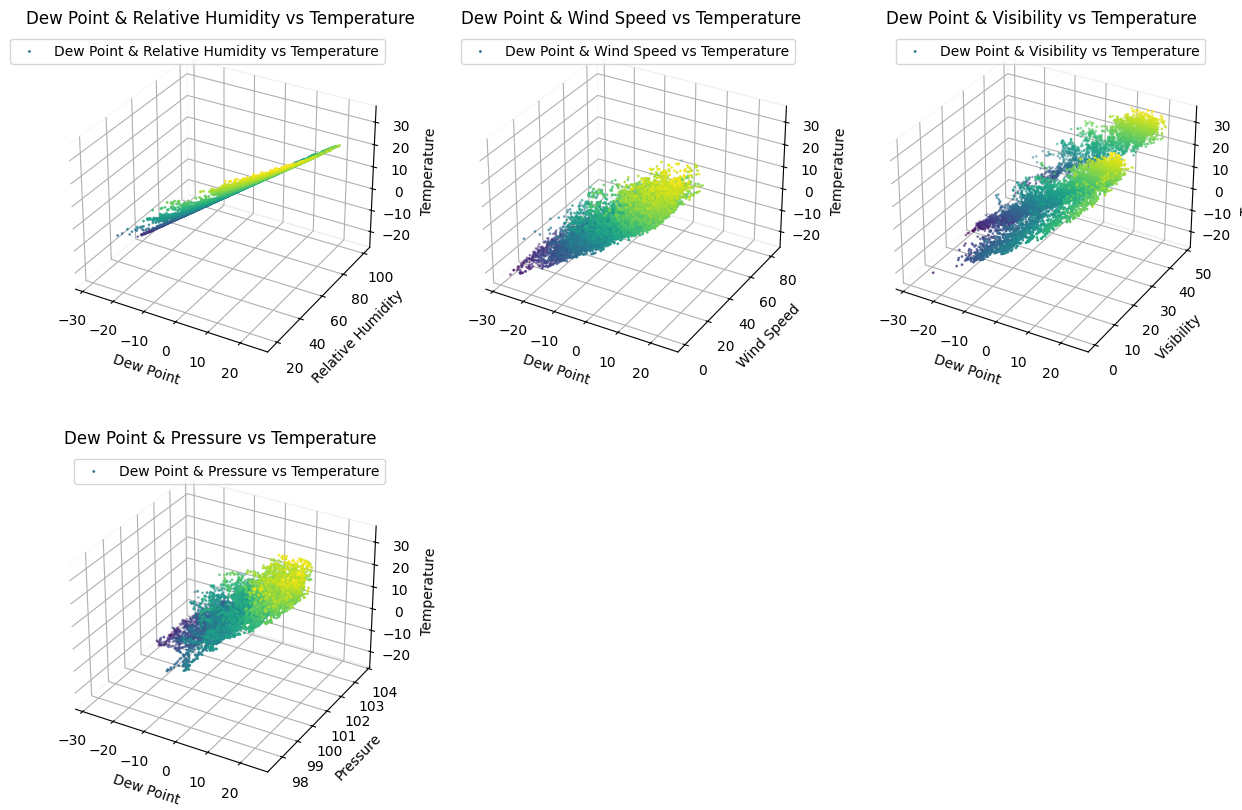

In [52]:
fig3 = plt.figure(figsize=(15,10))

#ax1
ax = plt.subplot(2,3,1,projection="3d")

x1 = df_orig["Dew Point Temp_C"]
x2 = df_orig["Rel Hum_%"]
y = df_orig["Temp_C"]

ax.scatter(x1, x2, y, s=1, c=y, cmap="viridis", label="Dew Point & Relative Humidity vs Temperature")
ax.set_title("Dew Point & Relative Humidity vs Temperature")

ax.set_xlabel("Dew Point")
ax.set_ylabel("Relative Humidity")
ax.set_zlabel("Temperature")

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.legend()

#ax2
ax = plt.subplot(2,3,2,projection="3d")

x1 = df_orig["Dew Point Temp_C"]
x2 = df_orig["Wind Speed_km/h"]
y = df_orig["Temp_C"]

ax.scatter(x1, x2, y, s=1, c=y, cmap="viridis", label="Dew Point & Wind Speed vs Temperature")
ax.set_title("Dew Point & Wind Speed vs Temperature")

ax.set_xlabel("Dew Point")
ax.set_ylabel("Wind Speed")
ax.set_zlabel("Temperature")

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.legend()

#ax3
ax = plt.subplot(2,3,3,projection="3d")

x1 = df_orig["Dew Point Temp_C"]
x2 = df_orig["Visibility_km"]
y = df_orig["Temp_C"]

ax.scatter(x1, x2, y, s=1, c=y, cmap="viridis", label="Dew Point & Visibility vs Temperature")
ax.set_title("Dew Point & Visibility vs Temperature")

ax.set_xlabel("Dew Point")
ax.set_ylabel("Visibility")
ax.set_zlabel("Temperature")

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.legend()

#ax4
ax = plt.subplot(2,3,4,projection="3d")

x1 = df_orig["Dew Point Temp_C"]
x2 = df_orig["Press_kPa"]
y = df_orig["Temp_C"]

ax.scatter(x1, x2, y, s=1, c=y, cmap="viridis", label="Dew Point & Pressure vs Temperature")
ax.set_title("Dew Point & Pressure vs Temperature")

ax.set_xlabel("Dew Point")
ax.set_ylabel("Pressure")
ax.set_zlabel("Temperature")

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

plt.legend()

plt.show()

The 3D plots allow us to see if combining Dew Point Temp_C with another variable provides a better representation of the relationship with Temp_C than Dew Point Temp_C alone.

**Dew Point Temp_C & Relative Humidity vs Temp_C:** This plot shows that when you consider both Dew Point and Relative Humidity together, the data points still tend to align along a surface rather than a simple line. Since Dew Point already has a strong linear relationship with Temperature, adding Relative Humidity, which has a negative correlation, seems to introduce some additional variation around that strong linear trend. The surface appears to slope upwards with increasing Dew Point and downwards with increasing Relative Humidity, consistent with the individual relationships observed earlier.

**Dew Point Temp_C & Wind Speed vs Temp_C:** Given that Wind Speed showed very little individual relationship with Temperature, adding it to the Dew Point vs. Temperature plot doesn't significantly change the appearance of the strong linear relationship between Dew Point and Temperature. The points are still tightly clustered around what looks like a plane, and the variation in Wind Speed doesn't seem to introduce a clear additional dimension to the relationship with Temperature.

**Dew Point Temp_C & Visibility vs Temp_C:** Similar to Wind Speed, Visibility had only a weak positive correlation with Temperature. When combined with Dew Point, the strong linear relationship between Dew Point and Temperature remains the dominant feature of the plot. The variation in Visibility introduces some spread, but it doesn't appear to dramatically alter the overall structure defined by the Dew Point-Temperature relationship.

**Dew Point Temp_C & Pressure vs Temp_C:** Pressure also showed a weak relationship with Temperature. In the 3D plot with Dew Point, the strong linear relationship between Dew Point and Temperature is still very evident. The variation in Pressure adds some noise or spread to the data points, but the overall plane defined by Dew Point and Temperature is the most prominent feature.

In summary, the 3D plots reinforce the finding that Dew Point Temp_C has the strongest relationship with Temp_C. While combining Dew Point Temp_C with Rel Hum_% might show a combined effect on Temp_C, combining Dew Point Temp_C with Wind Speed_km/h, Visibility_km, or Press_kPa doesn't appear to reveal significantly stronger relationships with Temp_C beyond the already strong one with Dew Point Temp_C.

This visual analysis triggers my decision to use Dew Point Temp_C and Rel Hum_% as features for your regression models, as they appeared to have the strongest individual relationships with the target variable.

In [37]:
df_orig.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [8]:
df = df_orig.drop(['Date/Time', 'Weather'], axis=1)
df

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,-1.8,-3.9,86,4,8.0,101.24
1,-1.8,-3.7,87,4,8.0,101.24
2,-1.8,-3.4,89,7,4.0,101.26
3,-1.5,-3.2,88,6,4.0,101.27
4,-1.5,-3.3,88,7,4.8,101.23
...,...,...,...,...,...,...
8779,0.1,-2.7,81,30,9.7,100.13
8780,0.2,-2.4,83,24,9.7,100.03
8781,-0.5,-1.5,93,28,4.8,99.95
8782,-0.2,-1.8,89,28,9.7,99.91


#### Assign the features (X)

In [9]:
df.columns

Index(['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h',
       'Visibility_km', 'Press_kPa'],
      dtype='object')

In [53]:
X = df[['Dew Point Temp_C', 'Rel Hum_%']]
X

,Dew Point Temp_C,Rel Hum_%
0,-3.9,86
1,-3.7,87
2,-3.4,89
3,-3.2,88
4,-3.3,88
...,...,...
8779,-2.7,81
8780,-2.4,83
8781,-1.5,93
8782,-1.8,89


#### Convert the features to numpy

In [54]:
X = X.to_numpy()
X

array([[-3.9, 86. ],
       [-3.7, 87. ],
       [-3.4, 89. ],
       ...,
       [-1.5, 93. ],
       [-1.8, 89. ],
       [-2.1, 86. ]])

#### Assign the Targets (y)

In [55]:
y = df["Temp_C"]
y

,Temp_C
0,-1.8
1,-1.8
2,-1.8
3,-1.5
4,-1.5
...,...
8779,0.1
8780,0.2
8781,-0.5
8782,-0.2


#### Convert the Targets to numpy

In [56]:
y = y.to_numpy()
y

array([-1.8, -1.8, -1.8, ..., -0.5, -0.2,  0. ])

#### Split the dataset into training and testing datasets

In [57]:
# import the train test split library
from sklearn.model_selection import train_test_split

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
X_train

array([[ 4.8, 80. ],
       [-3. , 32. ],
       [-1.5, 87. ],
       ...,
       [17. , 56. ],
       [-8. , 67. ],
       [ 9.8, 75. ]])

In [60]:
X_test

array([[ 9.6, 81. ],
       [-3.2, 73. ],
       [ 9.8, 83. ],
       ...,
       [-7. , 70. ],
       [ 0.9, 27. ],
       [13.9, 50. ]])

In [61]:
y_train

array([ 8. , 13.5,  0.4, ..., 26.4, -2.8, 14.2])

In [62]:
y_test

array([12.8,  1. , 12.6, ..., -2.3, 20.5, 25.1])

#### Convert the training and testing features and targets to tensor

In [63]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

In [67]:
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

#### Model 1: ReLU() Activation Function

Identify the input size of the training set

In [65]:
X_train_tensor.shape[1]

2

In [77]:
# Build the model
# 2 => 20 => 10 => 1

class regression_model_1(torch.nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.l1 = torch.nn.Linear(input_size, 20)
    self.af1 = torch.nn.ReLU()
    self.l2 = torch.nn.Linear(20, 10)
    self.af2 = torch.nn.ReLU()
    self.l3 = torch.nn.Linear(10, output_size)

  def forward(self, X_input):
    output = self.l1(X_input)
    output = self.af1(output)
    output = self.l2(output)
    output = self.af2(output)
    output = self.l3(output)
    return output


# create a model object
m1 = regression_model_1(2, 1)

# create a function to measure the model's performance
# using the Mean Squared Error Loss function
criterion1 = torch.nn.MSELoss()

# define an optimizer method: Gradient Descent
# set the learning rate: 0.01
optimizer1 = torch.optim.SGD(m1.parameters(),lr=0.0001) # 0.0001

# write the training loop
# set the number of epochs
epochs = 100000

m1.train()

for epoch in range(epochs):
  # Provide the values to the model to make predictions
  pred1 = m1(X_train_tensor)
  loss1 = criterion1(pred1, y_train_tensor)

  # backward
  optimizer1.zero_grad()
  loss1.backward()

  # next step
  optimizer1.step()

  if epoch % 10000 == 0:
    print(f"Epoch {epoch+1}/{epochs}, CE Loss: {loss1.item():.4f}")




Epoch 1/100000, CE Loss: 317.9651
Epoch 10001/100000, CE Loss: 12.1519
Epoch 20001/100000, CE Loss: 0.8463
Epoch 30001/100000, CE Loss: 0.1285
Epoch 40001/100000, CE Loss: 0.0800
Epoch 50001/100000, CE Loss: 0.0632
Epoch 60001/100000, CE Loss: 0.0526
Epoch 70001/100000, CE Loss: 0.0498
Epoch 80001/100000, CE Loss: 0.0490
Epoch 90001/100000, CE Loss: 0.0487


In [109]:
# evaluate the model
m1.eval()

with torch.no_grad():
  pred1 = m1(X_test_tensor)

  print(pred1)

tensor([[12.8474],
        [ 1.2556],
        [12.6554],
        ...,
        [-2.1642],
        [20.0851],
        [25.0816]])


In [79]:
y_test_tensor

tensor([[12.8000],
        [ 1.0000],
        [12.6000],
        ...,
        [-2.3000],
        [20.5000],
        [25.1000]])

Measure model 1's performance

In [107]:
from sklearn.metrics import mean_absolute_error, r2_score
import torch.nn.functional as F

In [110]:
# Calculate regression metrics
mae = mean_absolute_error(y_test_tensor.numpy(), pred1.detach().numpy())
mse = F.mse_loss(y_test_tensor, pred1)
rmse = torch.sqrt(mse) # Calculate RMSE using torch.sqrt with tensor input
r2 = r2_score(y_test_tensor.numpy(), pred1.detach().numpy())

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse.item():.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse.item():.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.1432
Mean Squared Error (MSE): 0.0434
Root Mean Squared Error (RMSE): 0.2082
R-squared (R2) Score: 0.9997


#### Model 2: Sigmoid() Activation Function

In [104]:
# Build the second model
# 2 => 15 => 8 => 1  (Different structure from Model 1: 2 => 20 => 10 => 1)

class regression_model_2(torch.nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.l1 = torch.nn.Linear(input_size, 15)
    self.af1 = torch.nn.Sigmoid() # Using Sigmoid activation
    self.l2 = torch.nn.Linear(15, 8)
    self.af2 = torch.nn.Sigmoid() # Using Sigmoid activation
    self.l3 = torch.nn.Linear(8, output_size)

  def forward(self, X_input):
    output = self.l1(X_input)
    output = self.af1(output)
    output = self.l2(output)
    output = self.af2(output)
    output = self.l3(output)
    return output

# create a model object
m2 = regression_model_2(X_train_tensor.shape[1], 1)

# create a function to measure the model's performance
# using the Mean Squared Error Loss function
criterion2 = torch.nn.MSELoss()

# define an optimizer method: Adam (different from Model 1's SGD)
# set the learning rate
optimizer2 = torch.optim.Adam(m2.parameters(), lr=0.001)

# write the training loop
# set the number of epochs
epochs = 100000 # Keep the same number of epochs for comparison

m2.train()

for epoch in range(epochs):
  # Provide the values to the model to make predictions
  pred2 = m2(X_train_tensor)
  loss2 = criterion2(pred2, y_train_tensor)

  # backward
  optimizer2.zero_grad()
  loss2.backward()

  # next step
  optimizer2.step()

  if epoch % 10000 == 0:
    print(f"Epoch {epoch+1}/{epochs}, MSE Loss: {loss2.item():.4f}")

Epoch 1/100000, MSE Loss: 208.4083
Epoch 10001/100000, MSE Loss: 1.0437
Epoch 20001/100000, MSE Loss: 0.0156
Epoch 30001/100000, MSE Loss: 0.0064
Epoch 40001/100000, MSE Loss: 0.0059
Epoch 50001/100000, MSE Loss: 0.0058
Epoch 60001/100000, MSE Loss: 0.0057
Epoch 70001/100000, MSE Loss: 0.0057
Epoch 80001/100000, MSE Loss: 0.0057
Epoch 90001/100000, MSE Loss: 0.0056


In [105]:
# evaluate the model
m2.eval()

with torch.no_grad():
  pred2 = m1(X_test_tensor)

  print(pred2)

tensor([[12.8474],
        [ 1.2556],
        [12.6554],
        ...,
        [-2.1642],
        [20.0851],
        [25.0816]])


In [106]:
y_test_tensor

tensor([[12.8000],
        [ 1.0000],
        [12.6000],
        ...,
        [-2.3000],
        [20.5000],
        [25.1000]])

Evaluate the model's performance

In [108]:
# Calculate model 2 regression metrics
mae = mean_absolute_error(y_test_tensor.numpy(), pred2.detach().numpy())
mse = F.mse_loss(y_test_tensor, pred2)
rmse = torch.sqrt(mse) # Calculate RMSE using torch.sqrt with tensor input
r2 = r2_score(y_test_tensor.numpy(), pred2.detach().numpy())

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse.item():.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse.item():.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

Mean Absolute Error (MAE): 0.1432
Mean Squared Error (MSE): 0.0434
Root Mean Squared Error (RMSE): 0.2082
R-squared (R2) Score: 0.9997


### Analysis and Reflection

Based on the performance evaluation:

-   **How well does each model perform?**
    Both models performed exceptionally well on this dataset. The R-squared score of 0.9997 for both indicates that approximately 99.97% of the variance in the temperature data can be explained by the features used in the models. The very low MAE, MSE, and RMSE values suggest that the predictions are very close to the actual temperature values on average.

-   **What might explain the differences in performance?**
    In this case, there were virtually no significant differences in performance between the two models based on the calculated metrics. This suggests that for this particular dataset and the chosen features (`Dew Point Temp_C` and `Rel Hum_%`), both the slightly different network architectures and the different activation functions (ReLU vs. Sigmoid) resulted in models with very similar predictive capabilities. It's possible that the relationship between the selected features and the target variable (`Temp_C`) is relatively linear or easily captured by even slightly different non-linear transformations provided by these activation functions, and the chosen architectures were sufficient to learn this relationship effectively.

-   **Which activation function worked better, and why?**
    Based purely on the final performance metrics (MAE, MSE, RMSE, R2), neither the ReLU nor the Sigmoid activation function demonstrated a clear superiority over the other in this specific scenario. Both led to models with nearly identical high performance. While ReLU is generally preferred in many deep learning applications due to its ability to mitigate the vanishing gradient problem and its computational efficiency, and Sigmoid can suffer from vanishing gradients, in this relatively simple regression task with this dataset, the potential disadvantages of Sigmoid might not have been significant enough to cause a noticeable drop in performance compared to ReLU within the given training parameters and epochs.

-   **Which model would you recommend, and under what conditions?**
    Given the virtually identical performance, there isn't a strong reason to prefer one model over the other based *solely* on these results. However, if forced to choose or considering potential for scaling to more complex problems, the model using **ReLU (Model 1)** might be slightly preferred due to the general advantages of ReLU in preventing vanishing gradients during training, which can be beneficial for larger or deeper networks or different datasets. If computational efficiency were a primary concern in deployment, ReLU is also generally faster to compute than Sigmoid.

    However, for this specific task and dataset, either model would be a suitable recommendation given their high performance. The choice between them might come down to minor considerations like ease of implementation or compatibility with specific hardware/software if there were any.